In [1]:
# I have installed imblearn from command prompt before importing it here
# Used command below - 
# pip install imblearn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [2]:
# Read Data File
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Move Target column to the end for readability
loan_df.rename({'Personal Loan':'Personal Loan Old'}, axis = 1, inplace = True)
loan_df.insert(14, 'Personal Loan', loan_df['Personal Loan Old'])
loan_df.drop(columns = 'Personal Loan Old', axis = 1, inplace = True)
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [4]:
# Get Basic Info of the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# According to result above, there are no null values in the data.

In [6]:
# Describe the data
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [7]:
# According to result above, 

# Minimum Age of the customer is 23 and Maximum age of the customer is 67.
# Average Age of the customer is 45.
# 25% of the customers are below age 35
# 50% of the customers are below age 45
# 75% of the customers are below age 55

# Minimum Experience of the customer is -3 and Maximum Experience of the customer is 43.
# Average Experience of the customer is 20.
# 25% of the customers have Experience below 10
# 50% of the customers have Experience below 20
# 75% of the customers have Experience below 30

# Minimum Income of the customer is 8 and Maximum Income of the customer is 224.
# Average Income of the customer is 73.
# 25% of the customers have Income below 39
# 50% of the customers have Income below 64
# 75% of the customers have Income below 98

# Simillar conclusion can be drawn for other attributes as well.

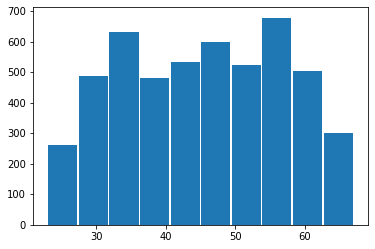

In [8]:
# Distribution of customers according to Age
plt.hist(loan_df['Age'], rwidth=0.95)
plt.show()

In [9]:
# According to graph avove, this is aproximately equally distributed data

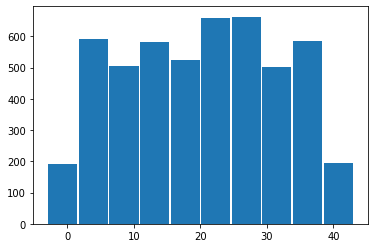

In [10]:
# Distribution of customers according to Experience
plt.hist(loan_df['Experience'], rwidth=0.95)
plt.show()

In [11]:
# According to graph avove, this is aproximately equally distributed data

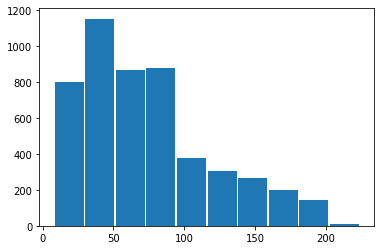

In [12]:
# Distribution of customers according to Income
plt.hist(loan_df['Income'], rwidth=0.95)
plt.show()

In [13]:
# According to graph avove, this is Right Tailed distribution

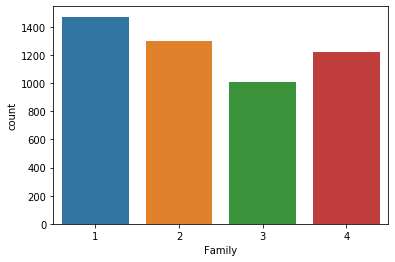

In [14]:
# Distribution of customers according to Family
sns.countplot(loan_df['Family'])
plt.show()

In [15]:
# According to graph avove, this is neither equally distributed nor right / left tailed distribution

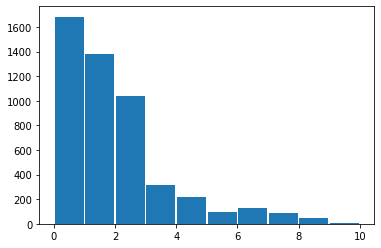

In [16]:
# Distribution of customers according to Credit Card Avg Spending
plt.hist(loan_df['CCAvg'], rwidth=0.95)
plt.show()

In [17]:
# According to graph avove, this is Right Tailed distribution

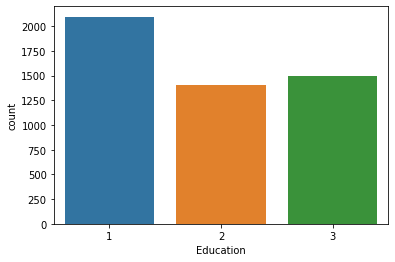

In [18]:
# Distribution of customers according to Education
sns.countplot(loan_df['Education'])
plt.show()

In [19]:
# According to graph avove, this is neither equally distributed nor right / left tailed distribution

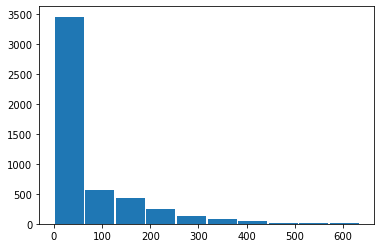

In [20]:
# Distribution of customers according to Mortgage
plt.hist(loan_df['Mortgage'], rwidth=0.95)
plt.show()

In [21]:
# According to graph avove, this is Right Tailed distribution

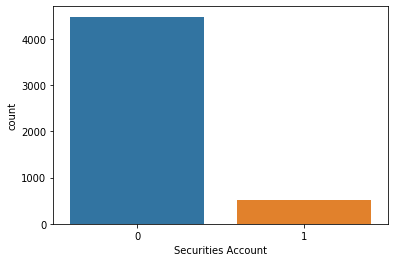

In [22]:
# Distribution of customers according to Securities Account
sns.countplot(loan_df['Securities Account'])
plt.show()

In [23]:
# According to graph avove, this is neither equally distributed nor right / left tailed distribution
# We can also conclude that maximum customers do not have securities account with the bank.

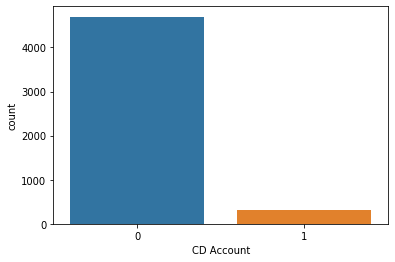

In [24]:
# Distribution of customers according to CD Account
sns.countplot(loan_df['CD Account'])
plt.show()

In [25]:
# According to graph avove, this is neither equally distributed nor right / left tailed distribution
# We can also conclude that maximum customers do not have CD account with the bank.

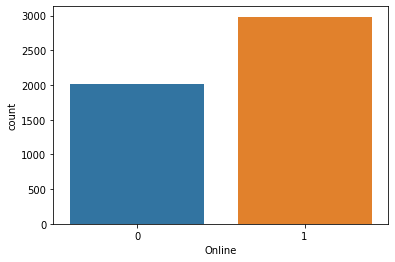

In [26]:
# Distribution of customers according to Online Account
sns.countplot(loan_df['Online'])
plt.show()

In [27]:
# According to graph avove, this is neither equally distributed nor right / left tailed distribution
# We can also conclude that more customers have Online account with the bank.

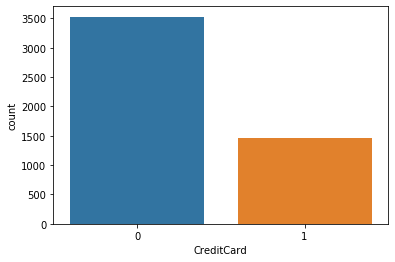

In [28]:
# Distribution of customers according to CreditCard
sns.countplot(loan_df['CreditCard'])
plt.show()

In [29]:
# According to graph avove, this is neither equally distributed nor right / left tailed distribution
# We can also conclude that more customers do not have Credit Card with the bank.

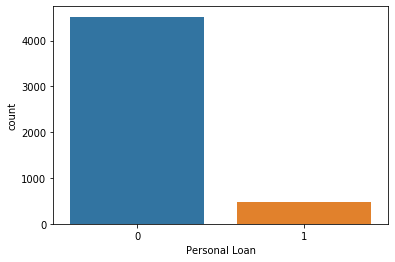

In [30]:
# Distribution of customers according to Personal Loan
sns.countplot(loan_df['Personal Loan'])
plt.show()

In [31]:
# According to graph avove, this is neither equally distributed nor right / left tailed distribution
# We can also conclude that very few customers have opted for personal loan with the bank.

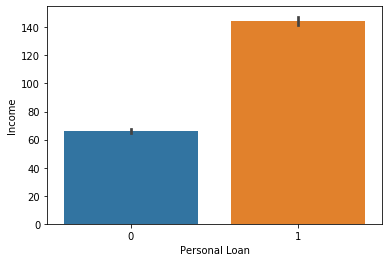

In [32]:
# Check relationship between Personal Loan and Income
sns.barplot(x="Personal Loan", y="Income", data=loan_df)
plt.show()

In [33]:
# According to the graph above, we can conclude that higher the income, higher chances of opting for Personal Loan

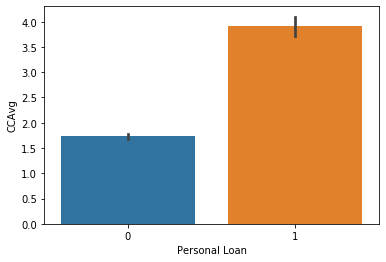

In [34]:
# Check relationship between Personal Loan and CCAvg
sns.barplot(x="Personal Loan", y="CCAvg", data = loan_df)
plt.show()

In [35]:
# According to the graph above, we can conclude that higher the Credit Card Avg, higher chances of opting for Personal Loan

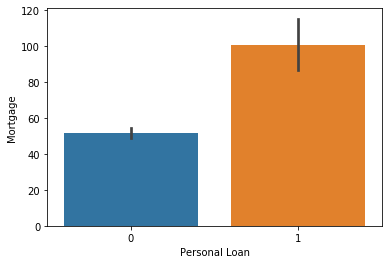

In [36]:
# Check relationship between Personal Loan and Mortgage
sns.barplot(x="Personal Loan", y="Mortgage", data = loan_df)
plt.show()

In [37]:
# According to the graph above, we can conclude that higher the Mortgage, higher chances of opting for Personal Loan

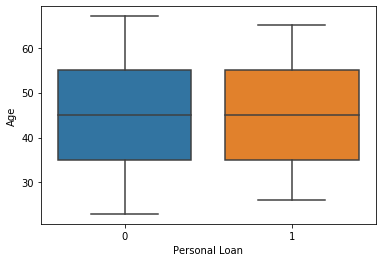

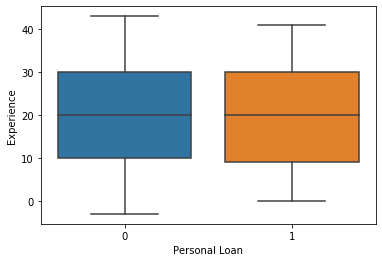

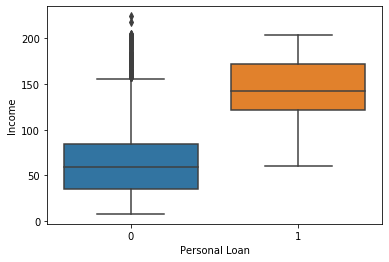

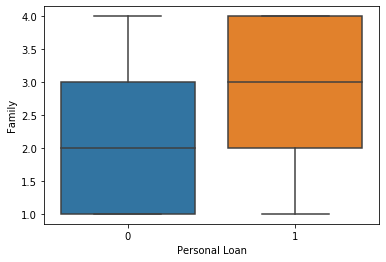

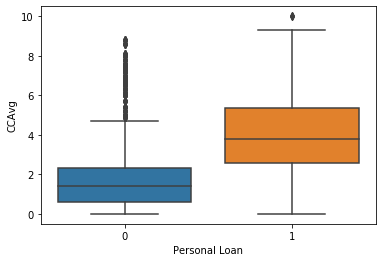

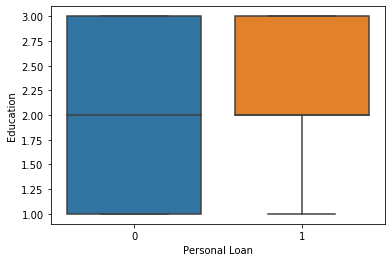

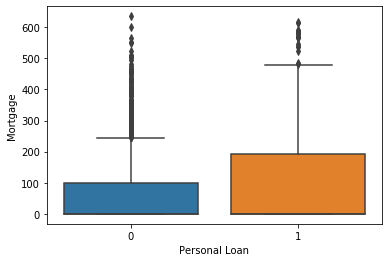

In [38]:
# Plot distribution of different attributes and class attributes
sns.boxplot( x='Personal Loan', y='Age', data=loan_df)
plt.show()

sns.boxplot( x='Personal Loan', y='Experience', data=loan_df)
plt.show()

sns.boxplot( x='Personal Loan', y='Income', data=loan_df)
plt.show()

sns.boxplot( x='Personal Loan', y='Family', data=loan_df)
plt.show()

sns.boxplot( x='Personal Loan', y='CCAvg', data=loan_df)
plt.show()

sns.boxplot( x='Personal Loan', y='Education', data=loan_df)
plt.show()

sns.boxplot( x='Personal Loan', y='Mortgage', data=loan_df)
plt.show()


In [39]:
# According to graphs above, Age and Experience do not make much difference while opting for Personal Loan.
# Whereas Higher Income, Higher Number of Family Members, Higher Credit Card Average and Higher Education 
# attributes contribute to opting for Personal Loan.

[]

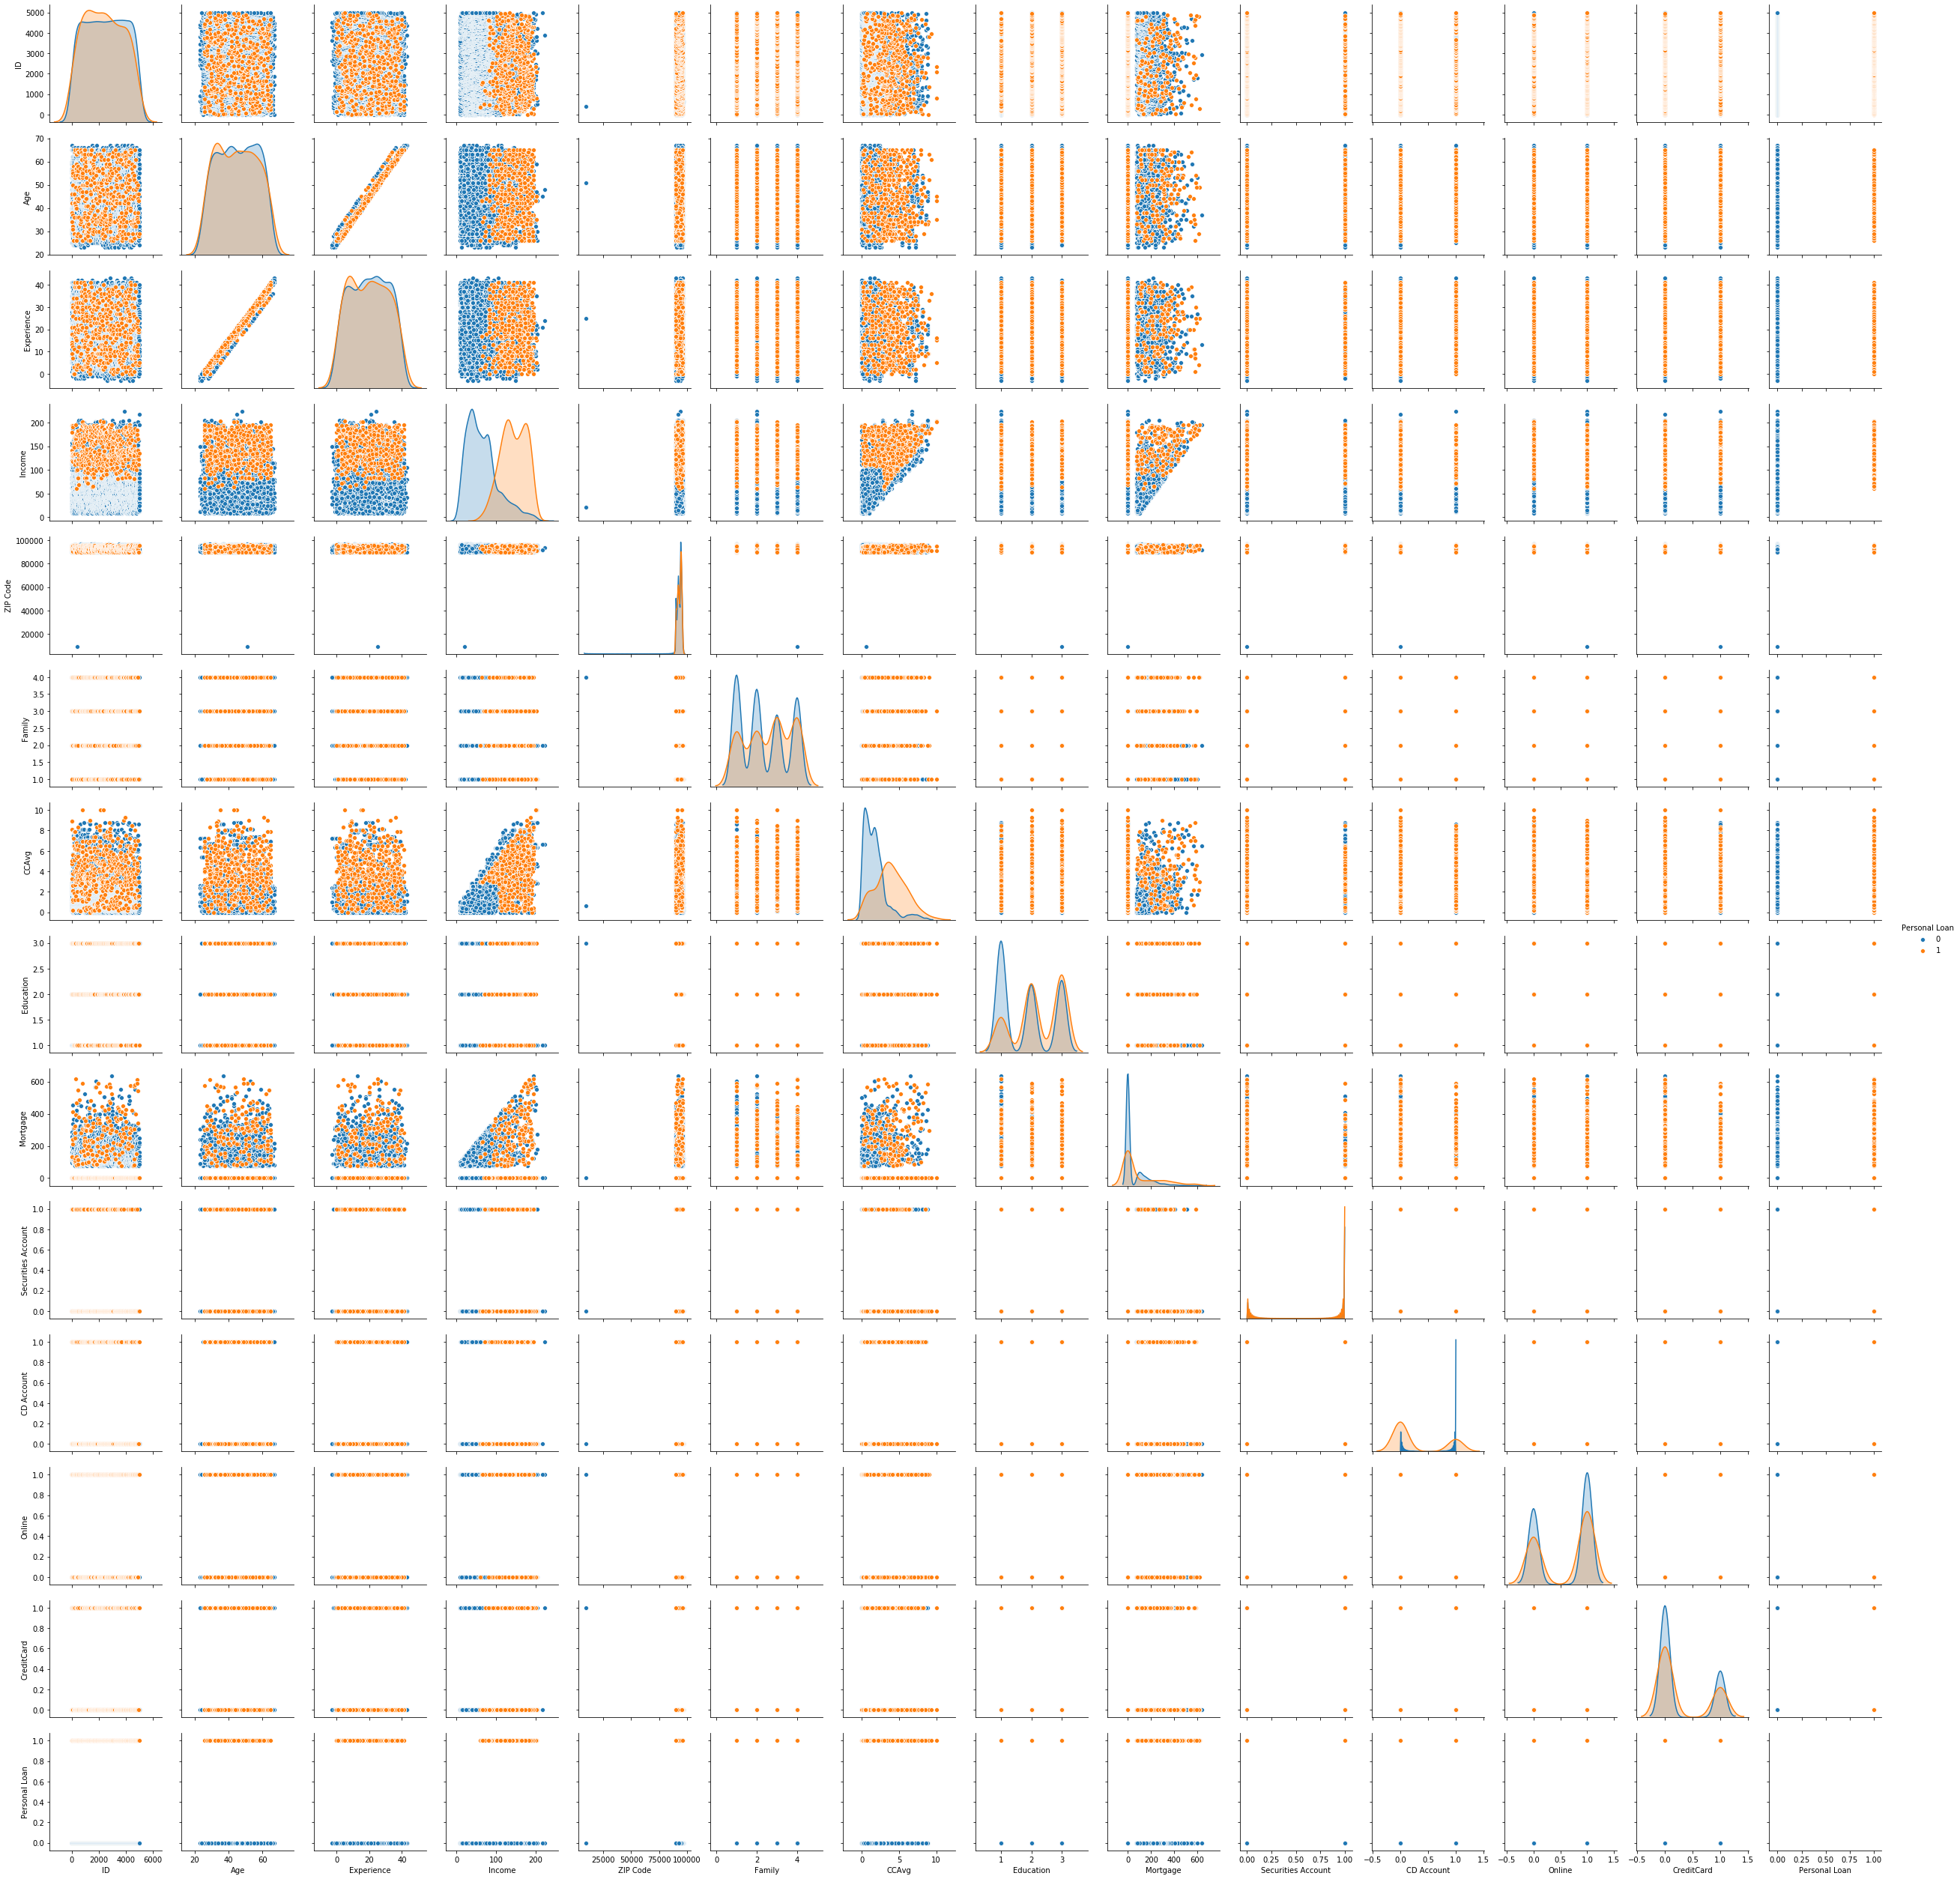

In [40]:
sns.pairplot(loan_df, diag_kind='kde', hue='Personal Loan')
plt.plot()

In [41]:
# According to graph above, we can conclude that features which impacts opting for Personal Loan are as below - 
# Income
# CCAvg
# Mortgage
# CD Account

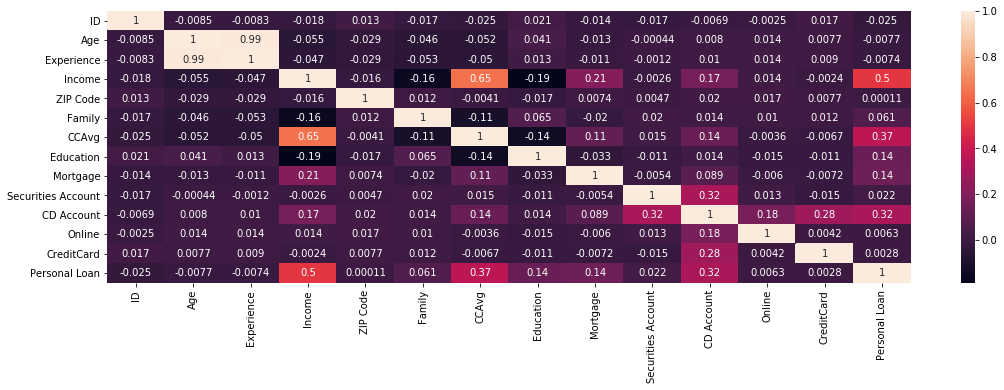

In [42]:
plt.figure(figsize=((18,5)))
sns.heatmap(loan_df.corr(),annot=True)
plt.show()

In [43]:
# According to graph above, we can conclude that features which impacts opting for Personal Loan are as below - 
# Income
# CCAvg
# Education
# Mortgage
# CD Account

# However, Income and CCAvg are strongly correlated.

In [88]:
# KNN Modelling

In [89]:
# Create the X(Feature-set) and Y(Target-set) sets of the Data.

X = loan_df.drop('Personal Loan', axis=1)
Y = loan_df['Personal Loan']

In [90]:
# Split the data as train and test with a ratio of 70:30.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [91]:
# Normalize the Data (X) to get values between 0 to 1.
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
# Build the KNN model using Train Dataset and predict the class on test dataset.

scaledX_train = sc.transform(X_train)
scaledX_test  = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [93]:
Y_predict_knn = knn.predict(scaledX_test)
Y_predict_knn

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
# Calculate the performance score of the classification on test dataset.

In [95]:
print("Testing Accuracy")
print(knn.score(scaledX_test, Y_test))

print("Training Accuracy")
print(knn.score(scaledX_train, Y_train))

Testing Accuracy
0.9446666666666667
Training Accuracy
0.976


In [96]:
# Find at which k value you get the best score.

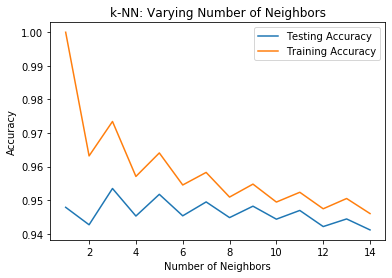

In [97]:
neighbors = np.arange(1, 15)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
sc = StandardScaler()
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)        
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train, Y_train)
        
        train.append(knn.score(scaledX_train, Y_train))
        test.append(knn.score(scaledX_test, Y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [98]:
# According to above graph, we can conclude that we get reasonable training and testing accuracy at K = 3 / K = 5 / K = 7
# At K = 5, we have relatively minimum difference in Training and Testing Accuracy and 
# relatively higher Testing Accuracy as well.

# Hence, we can consider K = 5.

In [99]:
# Logistic Modelling

In [100]:
# Features important for Target Column - Personal Loan are as below - 

# Income
# CCAvg
# Education
# Mortgage
# CD Account

# However, Income and CCAvg are strongly correlated. So, will not consider CCAVG feature.

loan_df_logistic = loan_df.copy()
loan_df_logistic = loan_df_logistic.drop(['ID', 'Age', 'Experience', 'ZIP Code', 'Family', 'CCAvg', 'Securities Account', 'Online', 'CreditCard'], axis=1)
loan_df_logistic.head()

,Income,Education,Mortgage,CD Account,Personal Loan
0,49,1,0,0,0
1,34,1,0,0,0
2,11,1,0,0,0
3,100,2,0,0,0
4,45,2,0,0,0


In [59]:
# Create the X(Feature-set) and Y(Target-set) sets of the Data.
X = loan_df_logistic.drop('Personal Loan', axis=1)
Y = loan_df_logistic['Personal Loan']

In [101]:
# Split the data as train and test with a ratio of 70:30.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [102]:
# Before SMOTE
Y.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [103]:
# Before SMOTE
Y_train.value_counts()

0    3169
1     331
Name: Personal Loan, dtype: int64

In [104]:
# As our data is imbalanced, we will need to apply SMOTE
smote = SMOTE()
X_train, Y_train = smote.fit_sample(X_train, Y_train)

In [105]:
# After SMOTE
Y.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [106]:
# After SMOTE
Y_train.value_counts()

1    3169
0    3169
Name: Personal Loan, dtype: int64

In [107]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
Y_pred_lr = lr.predict(X_test)
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
print("Testing Accuracy")
print(lr.score(X_test, Y_test))

print("Training Accuracy")
print(lr.score(X_train, Y_train))

Testing Accuracy
0.866
Training Accuracy
0.8980751025560113


In [110]:
# Naive Baye's Modelling

In [111]:
# Create the X(Feature-set) and Y(Target-set) sets of the Data.

X = loan_df.drop('Personal Loan', axis=1)
Y = loan_df['Personal Loan']

In [112]:
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [113]:
# Split the data as train and test with a ratio of 70:30.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [114]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [115]:
Y_pred_nb = nb.predict(X_test)
Y_pred_nb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
print("Testing Accuracy")
print(nb.score(X_test, Y_test))

print("Training Accuracy")
print(nb.score(X_train, Y_train))

Testing Accuracy
0.8826666666666667
Training Accuracy
0.8948571428571429


In [117]:
# Confusion Matrix

In [118]:
print("Confusion Matrix for KNN Model")

Confusion Matrix for KNN Model


In [119]:
print(metrics.confusion_matrix(Y_test, Y_predict_knn))

[[1339   12]
 [  71   78]]


In [125]:
#True Positives (TP): we correctly predicted that they will opt for loan 78

#True Negatives (TN): we correctly predicted that they won't opt for loan 1339

#False Positives (FP): we incorrectly predicted that they will opt for loan (a "Type I error") 12 Falsely predict positive Type I error

#False Negatives (FN): we incorrectly predicted that they dont opt for loan (a "Type II error") 78 Falsely predict negative Type II error

In [120]:
print("Confusion Matrix for Logistic Regression Model")

Confusion Matrix for Logistic Regression Model


In [121]:
print(metrics.confusion_matrix(Y_test, Y_pred_lr))

[[1177  174]
 [  27  122]]


In [126]:
#True Positives (TP): we correctly predicted that they will opt for loan 122

#True Negatives (TN): we correctly predicted that they won't opt for loan 1177

#False Positives (FP): we incorrectly predicted that they will opt for loan (a "Type I error") 174 Falsely predict positive Type I error

#False Negatives (FN): we incorrectly predicted that they dont opt for loan (a "Type II error") 27 Falsely predict negative Type II error

In [122]:
print("Confusion Matrix for Naive Baye's Model")

Confusion Matrix for Naive Baye's Model


In [123]:
print(metrics.confusion_matrix(Y_test, Y_pred_nb))

[[1239  112]
 [  64   85]]


In [127]:
#True Positives (TP): we correctly predicted that they will opt for loan 85

#True Negatives (TN): we correctly predicted that they won't opt for loan 1239

#False Positives (FP): we incorrectly predicted that they will opt for loan (a "Type I error") 112 Falsely predict positive Type I error

#False Negatives (FN): we incorrectly predicted that they dont opt for loan (a "Type II error") 64 Falsely predict negative Type II error

In [129]:
# According to me, We should try to reduce FN / Type II errors. 

# If we predict a customer will opt for a loan and will not opt for a loan i.e. FP, there is nothing to loose.
# However, if we don't predict a customer will opt for a loan and will not target that customer, 
# bank will loose that customer and business.

# With this analysis, Logistic Regression Model gives less FN / TypeII errors i.e. 27 which is lowest amongst all the models.


In [130]:
# Hence, Logistic Regression Model performs best in this case.